The treatment for HIV is called antiretroviral therapy (ART). ART involves taking a combination of HIV medicines (called an HIV treatment regimen) every day.
ART is recommended for everyone who has HIV. ART can’t cure HIV, but HIV medicines help people with HIV live longer, healthier lives. ART also reduces the risk of HIV transmission. (https://hivinfo.nih.gov/understanding-hiv/fact-sheets/hiv-treatment-basics)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# importing the dataset
coverage = pd.read_csv('art_coverage_by_country_clean.csv')
# In the original dataset Congo was in the Americas region
coverage.loc[36,'WHO Region'] = 'Africa' 

Since ART treatment is the only way to both limitate HIV transmission and death cause by the disease, i calculate the remainding ART coverage for each country in the America region in order to match the 100% people living with HIV. 

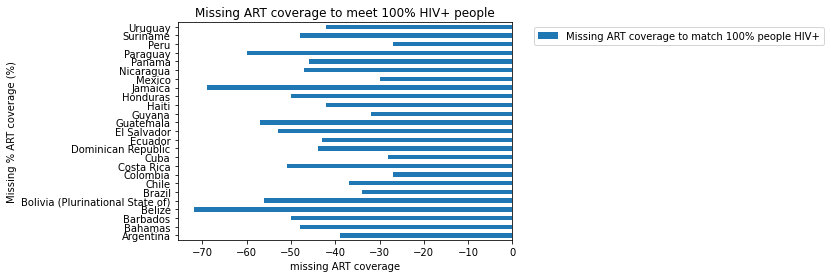

In [10]:
# select only the countries in Americas region
data = coverage.loc[coverage['WHO Region']=='Americas']

# select the columns from the df for analysis
art_cov = data[['Estimated ART coverage among people living with HIV (%)_median','Country']]

# set countries as indexes
country_index = art_cov.set_index('Country') 

# calculate the ART coverage each country should meet to cover the 100% od people living with HIV        
missing_cov = country_index - 100.0  

#Drop any row with missing values (NaN) 
no_empty = missing_cov.dropna(how='any')  

# ploting the data
no_empty.plot(kind='barh')
plt.xlabel('missing ART coverage')
plt.ylabel('Missing % ART coverage (%)')
plt.title('Missing ART coverage to meet 100% HIV+ people')
plt.legend(['Missing ART coverage to match 100% people HIV+'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')

plt.savefig('artCoverage.jpeg')


Children are unfortunately vulnarable by this disease. I used the data provided to see the number of children left without the ART treatment. If this number of children can be enrolled in the treatment, this will help save their lives. Haiti has by far the highest number of children in need for ART treatment based on WHO methods.

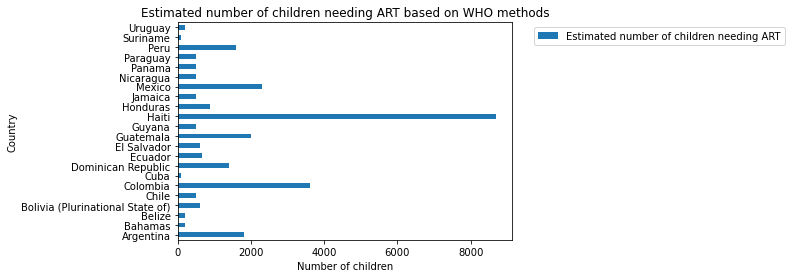

In [18]:
# importing the dataset
pediatric = pd.read_csv('art_pediatric_coverage_by_country_clean.csv')

# assign Congo to Africa region
pediatric.loc[36,'WHO Region'] = 'Africa'

# select only the countries in Americas region
haiti_ped = pediatric.loc[pediatric['WHO Region'] == 'Americas']  

# selct the columns for analysis
data = haiti_ped[['Country','Estimated number of children needing ART based on WHO methods_median']]

# set countries as indexes
ind = data.set_index('Country') 
# remove empty rows (NaN)
rmv_missing = ind.dropna(how='any') 

#Haiti has the highest number of HIV positive children in need of ART in the Americas based on WHO methods.
# ploting data
rmv_missing.plot(kind = 'barh')

plt.xlabel('Number of children')
plt.ylabel('Country')
plt.title('Estimated number of children needing ART based on WHO methods')
plt.legend(['Estimated number of children needing ART'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')
plt.savefig('childrenART.jpeg')

Besides Colombia where the number of pregnant women on ART is low comparing to those in need of the treatment, Haiti has a very high number of pregnant women in need for antiretroviral. This also results in the fact that the country has the highest number of children with HIV in the americas. The treatment should start with the pregnant women.

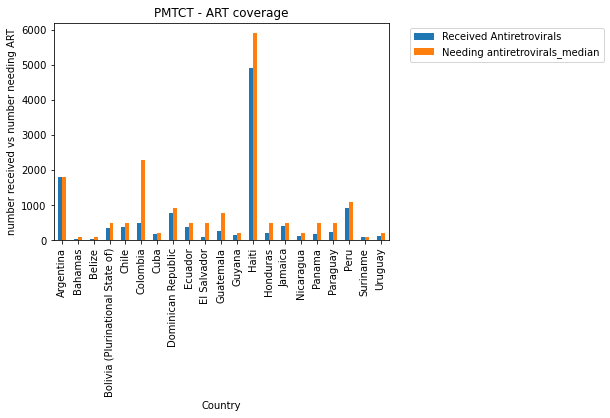

In [12]:
# import dataset
pmtct = pd.read_csv('prevention_of_mother_to_child_transmission_by_country_clean.csv')

# select only the countries in Americas region
haiti_pmtct = pmtct.loc[pmtct['WHO Region']=='Americas']  

# select columns need for analysis
pmtct_data = haiti_pmtct[['Country','Received Antiretrovirals','Needing antiretrovirals_median']]

# set coutries as indexes
pmtct_ind = pmtct_data.set_index('Country')

# drop Congo from the region
only_amer = pmtct_ind.drop('Congo')

# remove fields with no values (NaN)
rmv_null = only_amer.dropna(how='any')

# convert data in for ploting
rmv_null = rmv_null.astype({"Received Antiretrovirals": float})


# ploting data
rmv_null.plot(kind='bar')
plt.title('PMTCT - ART coverage')
plt.legend(['Received Antiretrovirals','Needing antiretrovirals_median'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')
plt.ylabel('number received vs number needing ART')
plt.savefig('pmtct.jpeg')